**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [55]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import pandas as pd
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [56]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [57]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [58]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [59]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [60]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [288]:
# Simulate ε_i,j^k for each graduate, career, and simulation draw
epsilon = np.random.normal(0, par.sigma, (par.N, par.J, par.K))

# Calculate expected utility and the average realized utility
expected_utility = par.v  # Theoretical expected utility
average_realized_utility = np.zeros(par.J)

# Calculate average realized utility for each career choice across all graduates and draws
for j in range(par.J):
    # Sum the intrinsic utility v_j and all ε_i,j^k, then average over all graduates and draws
    average_realized_utility[j] = np.mean(par.v[j] + epsilon[:, j, :])

# Print the expected and average realized utilities
print("Expected Utilities:", expected_utility)
print("Average Realized Utilities:", average_realized_utility)

Expected Utilities: [1 2 3]
Average Realized Utilities: [1.00372009 2.00312176 2.99640141]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

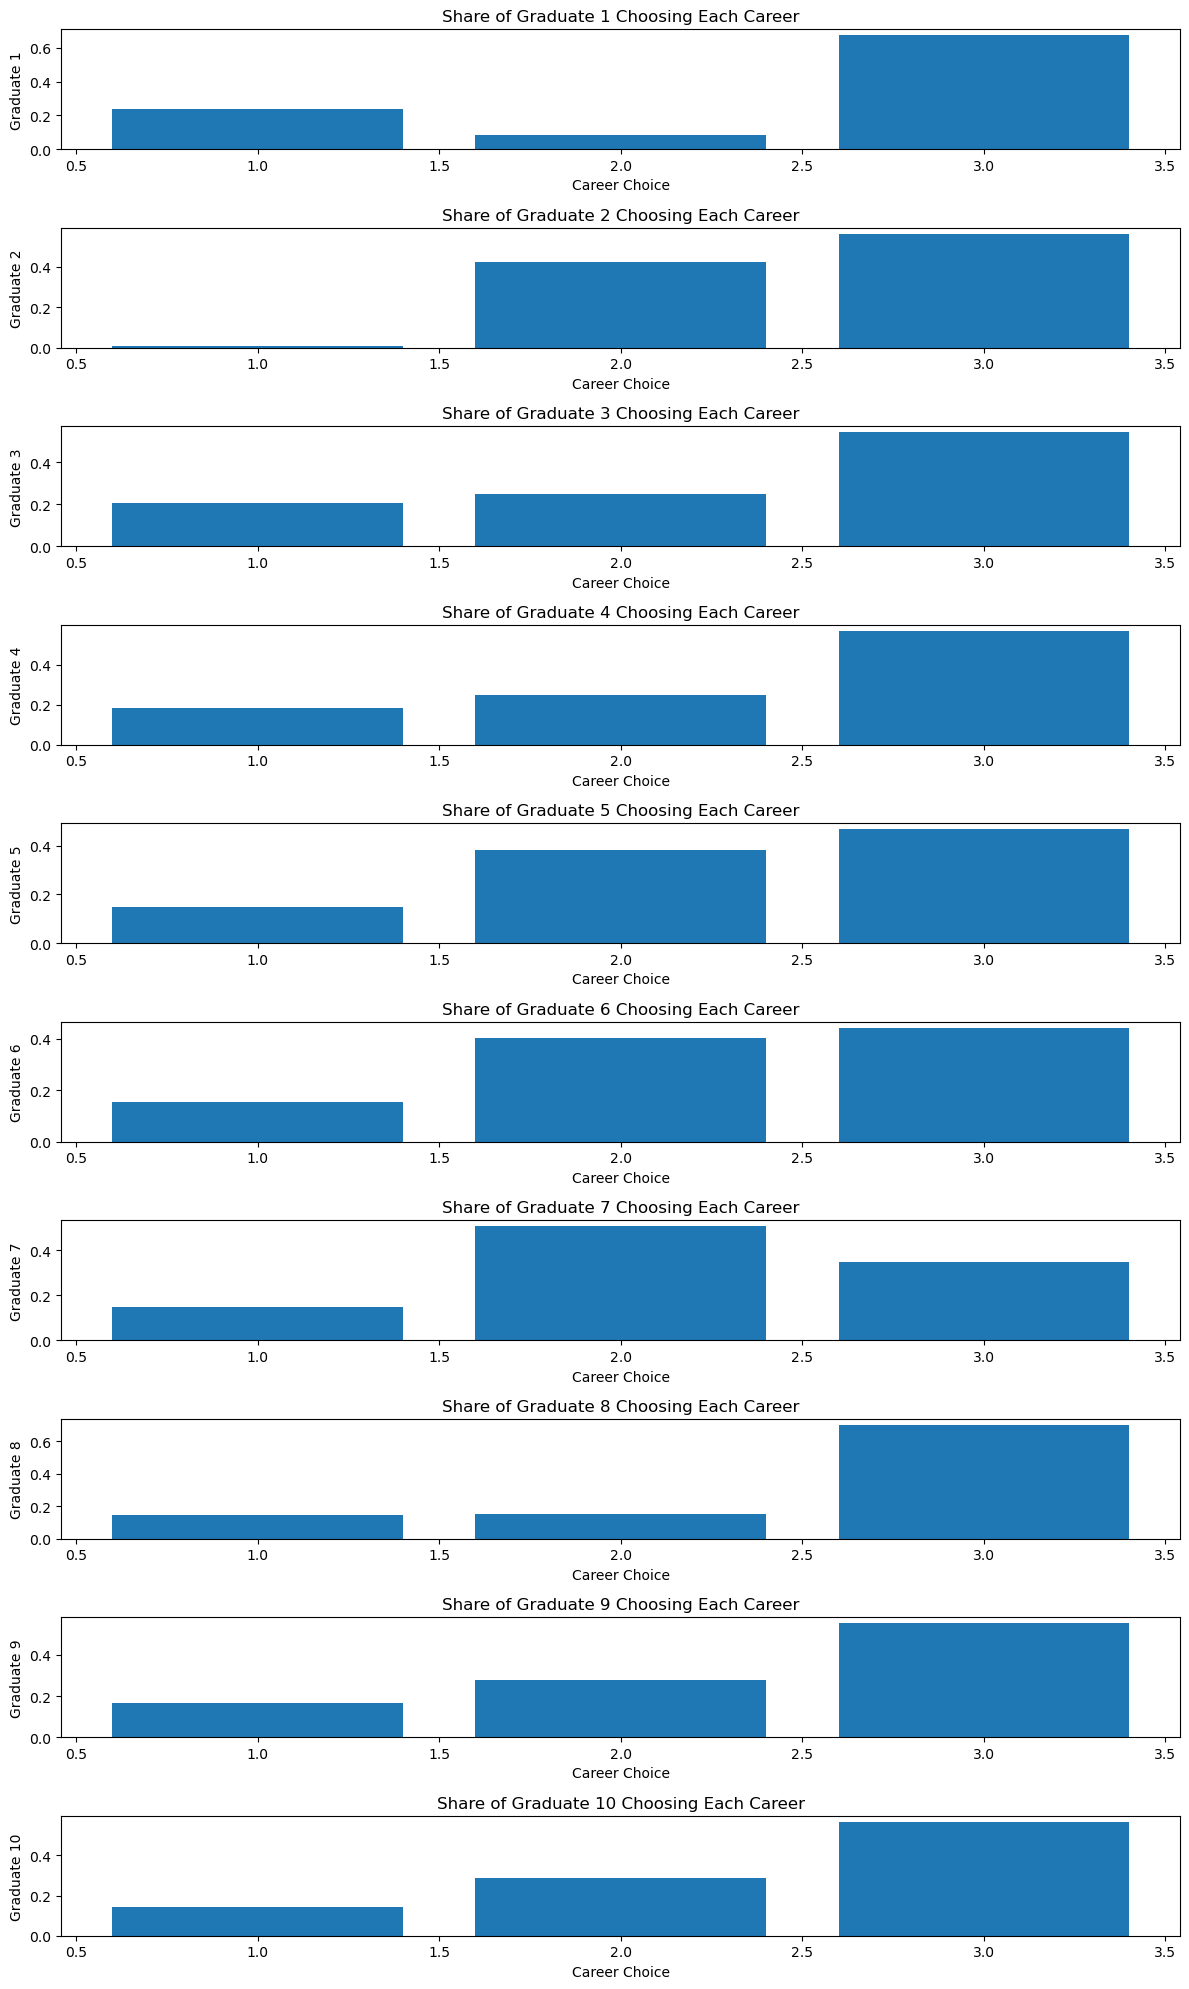

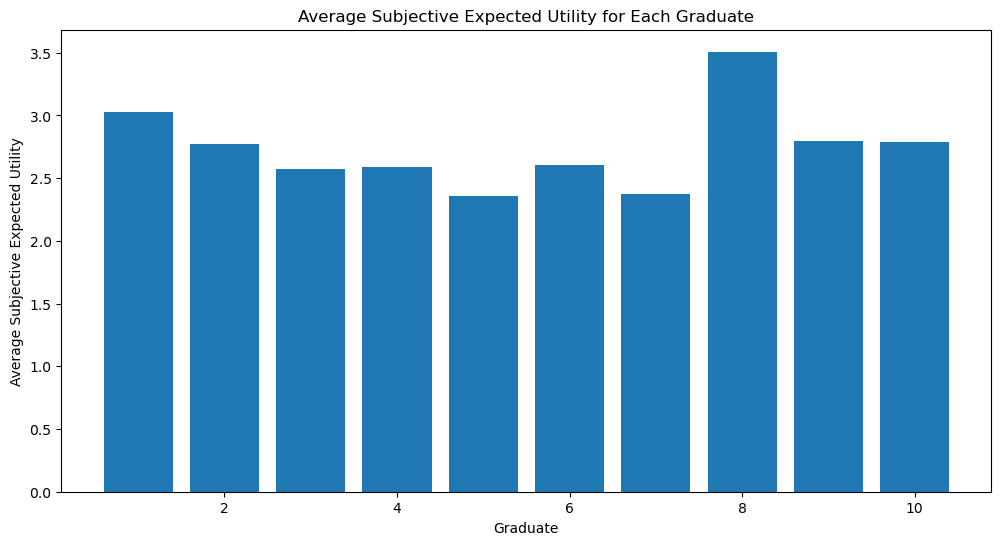

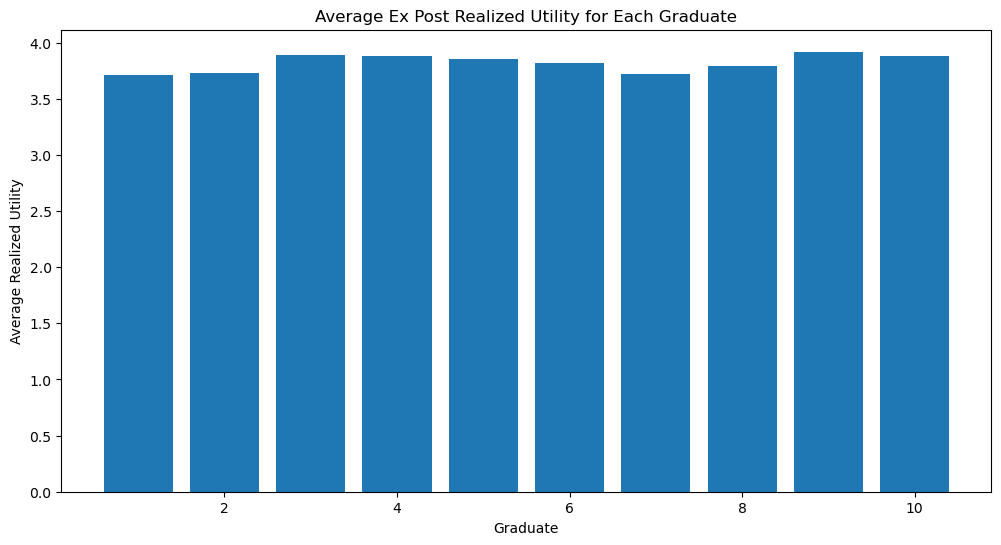

   Graduate  Average Expected Utility  Average Realized Utility
0         1                  3.028177                  3.713830
1         2                  2.775339                  3.725154
2         3                  2.570144                  3.890387
3         4                  2.586381                  3.882357
4         5                  2.356528                  3.855047
5         6                  2.602219                  3.819862
6         7                  2.373681                  3.719675
7         8                  3.508382                  3.792812
8         9                  2.798739                  3.918903
9        10                  2.789035                  3.883645


In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Given parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.F = np.arange(1, par.N + 1)
par.sigma = 2
par.v = np.array([1, 2, 3])

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Simulate ε_f,j for friends and ε_i,j for each graduate
friends_epsilon = np.random.normal(0, par.sigma, (par.N, par.J, par.K))
own_epsilon = np.random.normal(0, par.sigma, (par.N, par.J, par.K))

# Initialize arrays to store results for each graduate
chosen_careers = np.zeros((par.N, par.K), dtype=int)
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Step 2: Simulate and calculate the prior expected utility and choose the career with the highest expected utility
for k in range(par.K):
    for i in range(par.N):
        prior_expected_utility = np.zeros(par.J)
        
        # Calculate the prior expected utility based on friends' experiences
        for j in range(par.J):
            prior_expected_utility[j] = par.v[j] + np.mean(friends_epsilon[i, j, :par.F[i]])

        # Add the graduate's own noise term to the prior expected utility
        expected_utility_with_own_noise = np.zeros(par.J)
        for j in range(par.J):
            expected_utility_with_own_noise[j] = prior_expected_utility[j] + own_epsilon[i, j, k]
        
        # Choose the career with the highest expected utility
        chosen_career = np.argmax(expected_utility_with_own_noise)
        chosen_careers[i, k] = chosen_career
        
        # Store the expected and realized utilities for the chosen career
        expected_utilities[i, k] = prior_expected_utility[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_epsilon[i, chosen_career, k]

# Step 3: Calculate and visualize the results
# Calculate the share of graduates choosing each career for each graduate i
shares = np.zeros((par.N, par.J))
average_subjective_utility = np.zeros(par.N)
average_realized_utility = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        shares[i, j] = np.mean(chosen_careers[i, :] == j)
    average_subjective_utility[i] = np.mean(expected_utilities[i, :])
    average_realized_utility[i] = np.mean(realized_utilities[i, :])

# Visualize the results
# Share of graduates choosing each career for each graduate
fig, ax = plt.subplots(par.N, 1, figsize=(12, 2 * par.N))
for i in range(par.N):
    ax[i].bar(np.arange(1, par.J + 1), shares[i])
    ax[i].set_xlabel('Career Choice')
    ax[i].set_ylabel(f'Graduate {i+1}')
    ax[i].set_title(f'Share of Graduate {i+1} Choosing Each Career')
plt.tight_layout()
plt.show()

# Average subjective expected utility for each graduate
plt.figure(figsize=(12, 6))
plt.bar(np.arange(1, par.N + 1), average_subjective_utility)
plt.xlabel('Graduate')
plt.ylabel('Average Subjective Expected Utility')
plt.title('Average Subjective Expected Utility for Each Graduate')
plt.show()

# Average ex post realized utility for each graduate
plt.figure(figsize=(12, 6))
plt.bar(np.arange(1, par.N + 1), average_realized_utility)
plt.xlabel('Graduate')
plt.ylabel('Average Realized Utility')
plt.title('Average Ex Post Realized Utility for Each Graduate')
plt.show()

# Create a DataFrame to display the results in a table
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Average Expected Utility': average_subjective_utility,
    'Average Realized Utility': average_realized_utility
})

print(results_df)


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

   Graduate  Initial Career Choice  Optimal Career Choice  \
0         1                      3                      1   
1         2                      3                      1   
2         3                      3                      1   
3         4                      3                      2   
4         5                      3                      1   
5         6                      3                      1   
6         7                      2                      2   
7         8                      3                      2   
8         9                      3                      2   
9        10                      3                      1   

   Average Expected Utility  Average Realized Utility  Share Switched  
0                  2.767375                  2.740115          0.3756  
1                  2.737213                  2.713157          0.3836  
2                  2.743258                  2.734917          0.3864  
3                  2.711315             

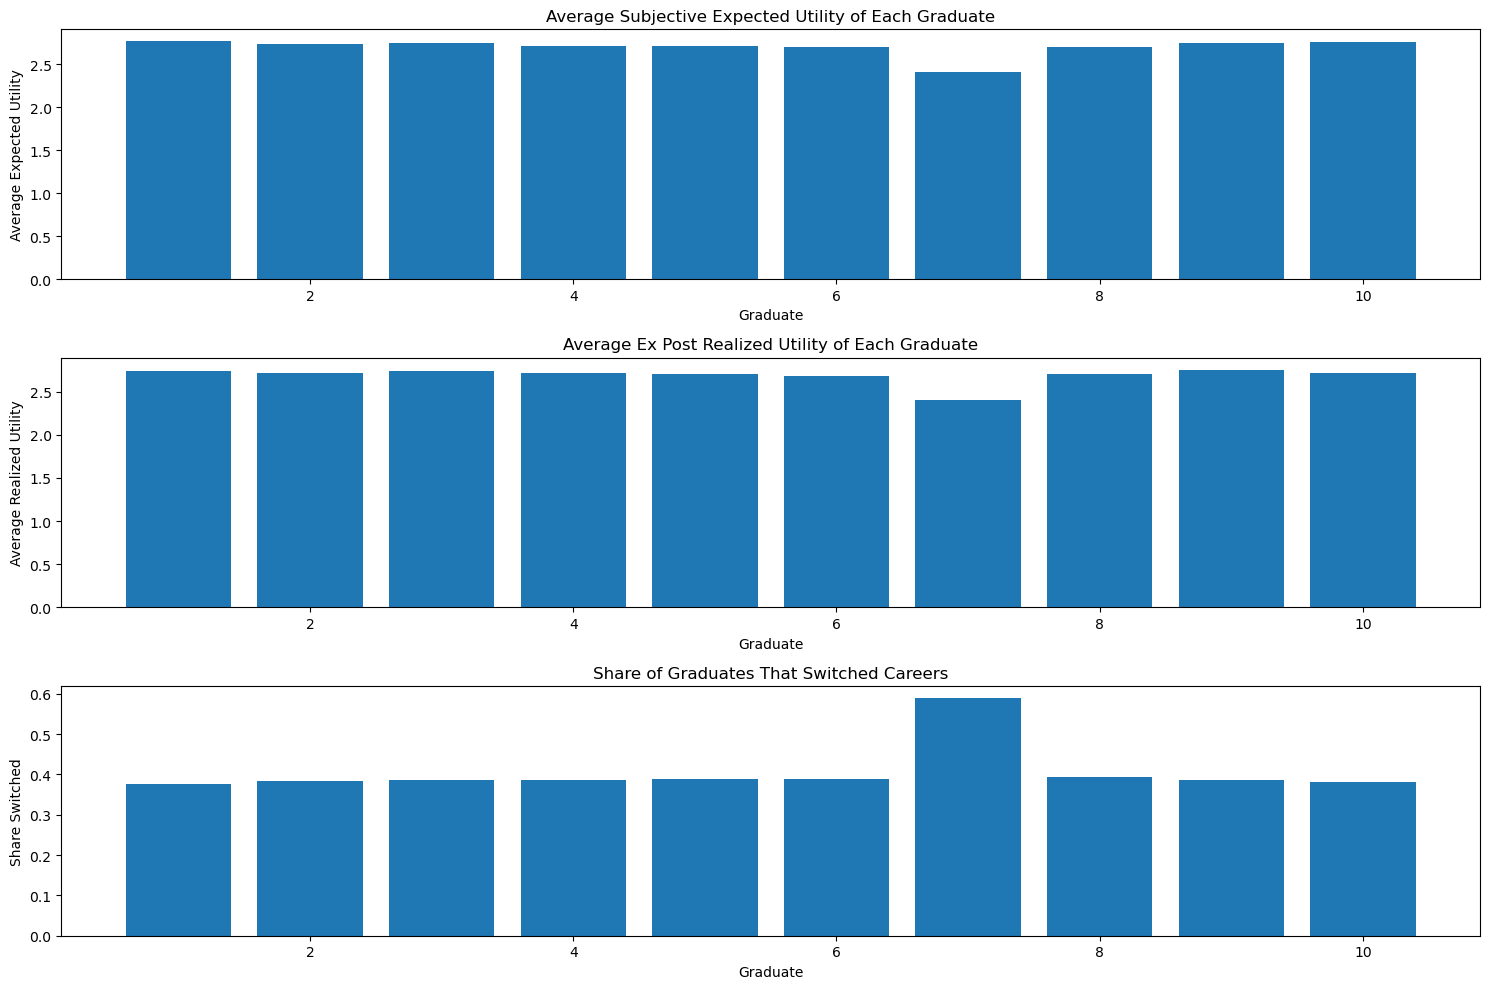

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
import pandas as pd

# Given parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1, par.N + 1)
par.sigma = 2

par.v = np.array([1, 2, 3])
par.c = 1

# Set random seed for reproducibility
np.random.seed(42)

# Function to perform the initial career choice simulation
def simulate_initial_career_choices(par):
    # Step 1: Simulate ε_f,j for friends and ε_i,j for each graduate
    friends_epsilon = np.random.normal(0, par.sigma, (par.N, par.J, par.K))
    own_epsilon = np.random.normal(0, par.sigma, (par.N, par.J, par.K))

    # Initialize arrays to store results
    chosen_careers = np.zeros(par.N, dtype=int)
    expected_utilities = np.zeros(par.N)
    realized_utilities = np.zeros(par.N)

    # Step 2: Simulate and calculate the prior expected utility and choose the career with the highest expected utility
    for i in range(par.N):
        prior_expected_utility = np.zeros(par.J)

        # Calculate the prior expected utility based on friends' experiences
        for j in range(par.J):
            prior_expected_utility[j] = par.v[j] + np.mean(friends_epsilon[i, j, :par.F[i]])

        # Add the graduate's own noise term to the prior expected utility
        expected_utility_with_own_noise = np.zeros(par.J)
        for j in range(par.J):
            expected_utility_with_own_noise[j] = prior_expected_utility[j] + np.mean(own_epsilon[i, j, :par.K])

        # Choose the career with the highest expected utility
        chosen_career = np.argmax(expected_utility_with_own_noise)
        chosen_careers[i] = chosen_career

        # Store the expected and realized utilities for the chosen career
        expected_utilities[i] = prior_expected_utility[chosen_career]
        realized_utilities[i] = par.v[chosen_career] + np.mean(own_epsilon[i, chosen_career, :par.K])

    return chosen_careers, expected_utilities, realized_utilities, friends_epsilon, own_epsilon

# Function to perform the second career choice simulation with switching cost
def simulate_second_career_choices(par, chosen_careers, realized_utilities, friends_epsilon, own_epsilon):
    # Initialize arrays to store results
    new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
    new_expected_utilities = np.zeros((par.N, par.K))
    new_realized_utilities = np.zeros((par.N, par.K))
    switches = np.zeros((par.N, par.K), dtype=bool)

    # Step 2: Simulate and calculate the new expected utility considering switching costs
    for i in range(par.N):
        for k in range(par.K):
            prior_expected_utility = np.zeros(par.J)

            # Calculate the prior expected utility based on friends' experiences
            for j in range(par.J):
                prior_expected_utility[j] = par.v[j] + friends_epsilon[i, j, k]

            # Modify the expected utilities to account for the switching cost
            new_prior_expected_utility = np.zeros(par.J)
            for j in range(par.J):
                if j == chosen_careers[i]:
                    new_prior_expected_utility[j] = realized_utilities[i]
                else:
                    new_prior_expected_utility[j] = prior_expected_utility[j] - par.c

            # Add the graduate's own noise term to the new prior expected utility
            new_expected_utility_with_own_noise = np.zeros(par.J)
            for j in range(par.J):
                new_expected_utility_with_own_noise[j] = new_prior_expected_utility[j] + own_epsilon[i, j, k]

            # Choose the career with the highest expected utility
            new_chosen_career = np.argmax(new_expected_utility_with_own_noise)
            new_chosen_careers[i, k] = new_chosen_career

            # Store the expected and realized utilities for the new chosen career
            new_expected_utilities[i, k] = new_prior_expected_utility[new_chosen_career]
            if new_chosen_career == chosen_careers[i]:
                new_realized_utilities[i, k] = realized_utilities[i]
            else:
                new_realized_utilities[i, k] = par.v[new_chosen_career] + own_epsilon[i, new_chosen_career, k] - par.c

            # Check if the graduate switched careers
            switches[i, k] = new_chosen_career != chosen_careers[i]

    return new_chosen_careers, new_expected_utilities, new_realized_utilities, switches

# Perform the initial career choice simulation
chosen_careers, expected_utilities, realized_utilities, friends_epsilon, own_epsilon = simulate_initial_career_choices(par)

# Perform the second career choice simulation with switching cost
new_chosen_careers, new_expected_utilities, new_realized_utilities, switches = simulate_second_career_choices(par, chosen_careers, realized_utilities, friends_epsilon, own_epsilon)

# Initialize arrays to store the final results for each graduate
final_expected_utilities = np.zeros(par.N)
final_realized_utilities = np.zeros(par.N)
final_shares_switched = np.zeros(par.N)
final_optimal_careers = np.zeros(par.N, dtype=int)

# Calculate the average subjective expected utility, average realized utility, share of switches, and final optimal career for each graduate
for i in range(par.N):
    final_expected_utilities[i] = np.mean(new_expected_utilities[i])
    final_realized_utilities[i] = np.mean(new_realized_utilities[i])
    final_shares_switched[i] = np.mean(switches[i])
    final_optimal_careers[i] = np.argmax([np.mean(new_expected_utilities[i, :]), np.mean(new_realized_utilities[i, :]), np.mean(switches[i, :])]) + 1  # +1 to adjust for 1-based indexing

# Create a DataFrame to display the results in a table
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Initial Career Choice': chosen_careers + 1,  # +1 to adjust for 1-based indexing
    'Optimal Career Choice': final_optimal_careers,
    'Average Expected Utility': final_expected_utilities,
    'Average Realized Utility': final_realized_utilities,
    'Share Switched': final_shares_switched
})

print(results_df)

# Visualize the results
plt.figure(figsize=(15, 10))

# Plot for the average expected utility of each graduate
plt.subplot(3, 1, 1)
plt.bar(results_df['Graduate'], results_df['Average Expected Utility'])
plt.xlabel('Graduate')
plt.ylabel('Average Expected Utility')
plt.title('Average Subjective Expected Utility of Each Graduate')

# Plot for the average realized utility of each graduate
plt.subplot(3, 1, 2)
plt.bar(results_df['Graduate'], results_df['Average Realized Utility'])
plt.xlabel('Graduate')
plt.ylabel('Average Realized Utility')
plt.title('Average Ex Post Realized Utility of Each Graduate')

# Plot for the share of graduates that switched careers
plt.subplot(3, 1, 3)
plt.bar(results_df['Graduate'], results_df['Share Switched'])
plt.xlabel('Graduate')
plt.ylabel('Share Switched')
plt.title('Share of Graduates That Switched Careers')

plt.tight_layout()
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [280]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

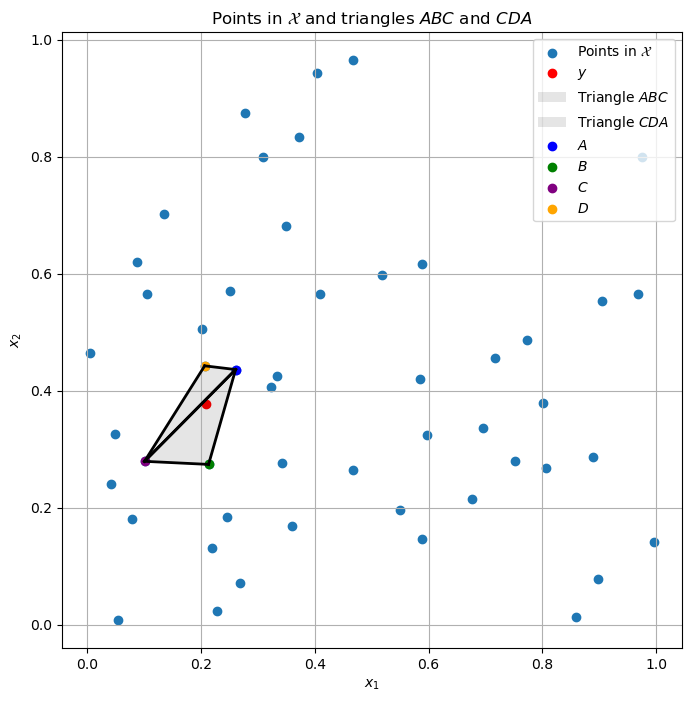

In [281]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Define a function to find the closest point in a specific quadrant
def find_closest_point(X, y, condition):
    distances = np.sqrt((X[:, 0] - y[0]) ** 2 + (X[:, 1] - y[1]) ** 2)
    filtered_indices = np.where(condition(X, y))
    if len(filtered_indices[0]) == 0:
        return None
    closest_index = filtered_indices[0][np.argmin(distances[filtered_indices])]
    return X[closest_index]

# Define conditions for each quadrant
condition_A = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] > y[1])
condition_B = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] < y[1])
condition_C = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] < y[1])
condition_D = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Find points A, B, C, and D
A = find_closest_point(X, y, condition_A)
B = find_closest_point(X, y, condition_B)
C = find_closest_point(X, y, condition_C)
D = find_closest_point(X, y, condition_D)

# Plot the points and the triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='Points in $\mathcal{X}$')
plt.scatter(y[0], y[1], color='red', label='$y$')

if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-', lw=2)
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-', lw=2)
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-', lw=2)
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'k', alpha=0.1, label='Triangle $ABC$')

if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k-', lw=2)
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k-', lw=2)
    plt.plot([A[0], C[0]], [A[1], C[1]], 'k-', lw=2)
    plt.fill([C[0], D[0], A[0]], [C[1], D[1], A[1]], 'k', alpha=0.1, label='Triangle $CDA$')

plt.scatter(*A, color='blue', label='$A$' if A is not None else 'Not found')
plt.scatter(*B, color='green', label='$B$' if B is not None else 'Not found')
plt.scatter(*C, color='purple', label='$C$' if C is not None else 'Not found')
plt.scatter(*D, color='orange', label='$D$' if D is not None else 'Not found')

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Points in $\mathcal{X}$ and triangles $ABC$ and $CDA$')
plt.grid(True)
plt.show()


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [282]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [283]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [284]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [285]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [286]:
# write your answer here